In [7]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
keras.backend.backend()

'tensorflow'

In [9]:
fm=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fm.load_data()

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [13]:
y_train[0]

9

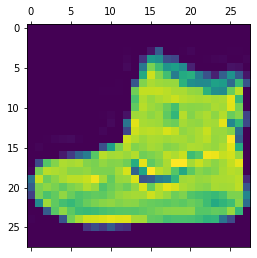

In [14]:
plt.matshow(x_train[0])

### Normalize the data before training the neural net

In [15]:
x_train=x_train/255
x_test=x_test/255

### Building the neural network . It has three components:
- Input layer
- Hidden layers
- Output layers

In [16]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Activation

In [18]:
model=Sequential()
model.add(Flatten(input_shape=[28,28]))#input layer converts(Flatten) the 28 x 28 matrix into 1D array
model.add(Dense(100,activation='relu'))#Number of Hidden layers are 100
model.add(Dense(10,activation='softmax'))# number of output layers are 10 as the data set contain the level ranging from 0-9

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.3734 - accuracy: 0.8663
Epoch 2/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.3382 - accuracy: 0.8757
Epoch 3/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.3123 - accuracy: 0.8864
Epoch 4/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.2973 - accuracy: 0.8902
Epoch 5/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.2823 - accuracy: 0.8966
Epoch 6/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.2702 - accuracy: 0.9001
Epoch 7/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.2598 - accuracy: 0.9033
Epoch 8/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.2510 - accuracy: 0.9067
Epoch 9/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.2431 - accuracy: 0.9092
Epoch 10/10
60000/60000 [=====================

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.evaluate(x_test,y_test)


10000/10000 [==============================] - 1s 62us/step


[0.32798354729413987, 0.8873000144958496]

### Here the loss 32% and the model accuracy 88%

In [28]:
predicted=model.predict(x_test)

In [29]:
predicted[3]

array([9.4267961e-08, 9.9999952e-01, 5.0843389e-11, 3.3658870e-07,
       2.1399600e-08, 8.2134138e-17, 1.0514173e-09, 2.4792200e-21,
       1.4999165e-13, 2.1118358e-16], dtype=float32)

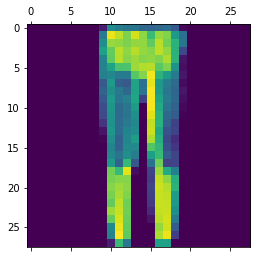

In [31]:
plt.matshow(x_test[3])

In [32]:
np.argmax(predicted[3])

1

In [33]:
classes= ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
#classes are organized according to the dataset

In [34]:
classes[np.argmax(predicted[3])]

'Trouser'